# Import python packages

In [16]:
# import Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Read data

In [17]:
stepover_data = pd.read_csv('stepover_info.csv',header=0)
print(stepover_data.head())

         width        length         type          style     label  \
0  1427.570129  89345.666430  restraining   left-lateral  breached   
1   741.718075  11534.543818  restraining  right-lateral  breached   
2   592.473005   4645.274044  restraining  right-lateral  breached   
3   926.182799   3305.332866  restraining  right-lateral  breached   
4   222.964371   1409.459123  restraining  right-lateral  breached   

         event  
0  Balochistan  
1      Borrego  
2     Darfield  
3     Darfield  
4     Darfield  


Stress distribution around sharp crack:

\begin{equation}

\tau_{ij}  \approx \frac{K}{\sqrt{2 \pi r}} f_{ij}(\theta)

\end{equation}

where $K \sim \Delta\tau\sqrt{L}$ is the stress intensity factor that depends on the crack geometry and loading configuration, $\Delta\tau$ being the difference between
the far-field stress and stress resolved on the crack walls (stress drop), r is the distance to the crack tip measured from the crack exterior, and $f_{ij}(\theta)$ is a function characterizing the azimuthal dependence of the near-tip stress field.


In [18]:
def mode_II_stress_field(stress_drop,L,W,mu,style,type_stepover,pYN):
    # Calculate stress intensity factor
    K = stress_drop*np.sqrt(L)

    if style == 'RL':
        if type_stepover == 'restraining':
        # Solve for theta optimal 
            normal_stress = []
            shear_stress = []
            coulomb_stress = []
            theta = np.linspace(0.1,np.pi,100)
            # make shear, normal, and Coulomb stress
            for i in range(len(theta)):
                # Calculate azimuthal functions
                theta_II_shear = np.cos(theta[i]/2)*(1 - np.sin(theta[i]/2)*np.sin((3*theta[i])/2))
                theta_II_normal = np.sin(theta[i]/2)*np.cos(theta[i]/2)*np.cos((3*theta[i])/2)
                # Estimate shear, normal, and Coulomb stress
                si = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta[i]))*theta_II_shear
                ni = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta[i]))*theta_II_normal
                coulomb_stress.append((si+ni*mu))
                shear_stress.append(si)
                normal_stress.append(ni)
            
            max_coulomb_index = coulomb_stress.index(max(coulomb_stress))
            theta_optimal = theta[max_coulomb_index]

            if pYN == 'plotYES':
                normalized = (coulomb_stress - min(coulomb_stress)) / (max(coulomb_stress) - min(coulomb_stress))
                plt.plot(theta,normalized,c='firebrick',label='RL, C')
                plt.xlabel(r'$\theta$')
                plt.ylabel('Shear stress (Pa)')


            # estimate all components
            theta_II_shear = np.cos(theta_optimal/2)*(1 - np.sin(theta_optimal/2)*np.sin((3*theta_optimal)/2))
            theta_II_normal = np.sin(theta_optimal/2)*np.cos(theta_optimal/2)*np.cos((3*theta_optimal)/2)
            # Estimate shear, normal, and Coulomb stress
            shear_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta_optimal))*theta_II_shear
            normal_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta_optimal))*theta_II_normal         
            coulomb_stress = (shear_stress+normal_stress*mu)

        elif type_stepover == 'releasing':
        # Solve for theta optimal 
            normal_stress = []
            shear_stress = []
            coulomb_stress = []
            theta = np.linspace(-np.pi,-0.1,100)
            
            # make shear, normal, and Coulomb stress
            for i in range(len(theta)):
                # Calculate azimuthal functions
                theta_II_shear = np.cos(theta[i]/2)*(1 - np.sin(theta[i]/2)*np.sin((3*theta[i])/2))
                theta_II_normal = np.sin(theta[i]/2)*np.cos(theta[i]/2)*np.cos((3*theta[i])/2)
                # Estimate shear, normal, and Coulomb stress
                si = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta[i])))*theta_II_shear
                ni = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta[i])))*theta_II_normal
                coulomb_stress.append((si+ni*mu))
                shear_stress.append(si)
                normal_stress.append(ni)
            
            max_coulomb_index = coulomb_stress.index(max(coulomb_stress))
            theta_optimal =theta[max_coulomb_index]

            if pYN == 'plotYES':
                normalized = (coulomb_stress - min(coulomb_stress)) / (max(coulomb_stress) - min(coulomb_stress))
                plt.plot(theta,normalized,c='steelblue',label='RL, T')

            # estimate all components
            theta_II_shear = np.cos(theta_optimal/2)*(1 - np.sin(theta_optimal/2)*np.sin((3*theta_optimal)/2))
            theta_II_normal = np.sin(theta_optimal/2)*np.cos(theta_optimal/2)*np.cos((3*theta_optimal)/2)
            # Estimate shear, normal, and Coulomb stress
            shear_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta_optimal)))*theta_II_shear
            normal_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta_optimal)))*theta_II_normal         
            coulomb_stress = (shear_stress+normal_stress*mu)      

    elif style == 'LL':
        if type_stepover == 'restraining':
        # Solve for theta optimal 
            normal_stress = []
            shear_stress = []
            coulomb_stress = []
            theta = np.linspace(-np.pi,-0.1,100)
            
            # make shear, normal, and Coulomb stress
            for i in range(len(theta)):
                # Calculate azimuthal functions
                theta_II_shear = np.cos(theta[i]/2)*(1 - np.sin(theta[i]/2)*np.sin((3*theta[i])/2))
                theta_II_normal = np.sin(theta[i]/2)*np.cos(theta[i]/2)*np.cos((3*theta[i])/2)
                # Estimate shear, normal, and Coulomb stress
                si = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta[i])))*theta_II_shear
                ni = -(K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta[i])))*theta_II_normal
                coulomb_stress.append((si+ni*mu))
                shear_stress.append(si)
                normal_stress.append(ni)

            max_coulomb_index = coulomb_stress.index(max(coulomb_stress))
            theta_optimal = theta[max_coulomb_index]

            if pYN == 'plotYES':
                normalized = (coulomb_stress - min(coulomb_stress)) / (max(coulomb_stress) - min(coulomb_stress))
                plt.plot(theta,normalized,c='goldenrod',label='LL, C')
                print('restraining LL')
                print(theta_optimal*180/np.pi)

            # estimate all components
            theta_II_shear = np.cos(theta_optimal/2)*(1 - np.sin(theta_optimal/2)*np.sin((3*theta_optimal)/2))
            theta_II_normal = np.sin(theta_optimal/2)*np.cos(theta_optimal/2)*np.cos((3*theta_optimal)/2)
            # Estimate shear, normal, and Coulomb stress
            shear_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta_optimal)))*theta_II_shear
            normal_stress = -(K/np.sqrt(2*np.pi*W))*np.sqrt(np.abs(np.sin(theta_optimal)))*theta_II_normal         
            coulomb_stress = (shear_stress+normal_stress*mu)



        elif type_stepover == 'releasing':
        # Solve for theta optimal 
            normal_stress = []
            shear_stress = []
            coulomb_stress = []
            theta = np.linspace(0.1,np.pi,100)

            # make shear, normal, and Coulomb stress
            for i in range(len(theta)):
                # Calculate azimuthal functions
                theta_II_shear = np.cos(theta[i]/2)*(1 - np.sin(theta[i]/2)*np.sin((3*theta[i])/2))
                theta_II_normal = np.sin(theta[i]/2)*np.cos(theta[i]/2)*np.cos((3*theta[i])/2)
                # Estimate shear, normal, and Coulomb stress
                si = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta[i]))*theta_II_shear
                ni = -(K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta[i]))*theta_II_normal
                coulomb_stress.append((si+ni*mu))
                shear_stress.append(si)
                normal_stress.append(ni)

            max_coulomb_index = coulomb_stress.index(max(coulomb_stress))
            theta_optimal = theta[max_coulomb_index]
            
            if pYN == 'plotYES':
                normalized = (coulomb_stress - min(coulomb_stress)) / (max(coulomb_stress) - min(coulomb_stress))
                plt.plot(theta,normalized,c='slategrey',label='LL, T')
                print('releasing LL')
                print(theta_optimal*180/np.pi)

            # estimate all components
            theta_II_shear = np.cos(theta_optimal/2)*(1 - np.sin(theta_optimal/2)*np.sin((3*theta_optimal)/2))
            theta_II_normal = np.sin(theta_optimal/2)*np.cos(theta_optimal/2)*np.cos((3*theta_optimal)/2)
            # Estimate shear, normal, and Coulomb stress
            shear_stress = (K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta_optimal))*theta_II_shear
            normal_stress = -(K/np.sqrt(2*np.pi*W))*np.sqrt(np.sin(theta_optimal))*theta_II_normal         
            coulomb_stress = (shear_stress+normal_stress*mu)

    else:
        raise KeyError("The crack must be right or left-lateral")

    return shear_stress,normal_stress, coulomb_stress,theta_optimal


releasing LL
118.38924473026047
restraining LL
-30.37388005920406


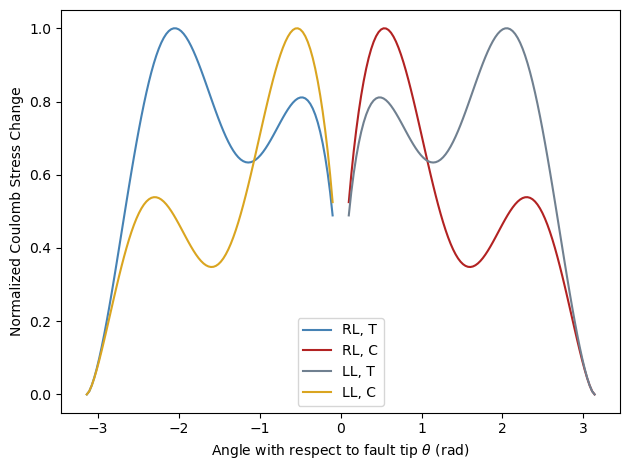

In [19]:
plt.figure()

stress_drop = 3*10**6
mu = 0.4

mode_II_stress_field(stress_drop,1000,1000,mu,'RL','releasing','plotYES')
mode_II_stress_field(stress_drop,1000,1000,mu,'RL','restraining','plotYES')
mode_II_stress_field(stress_drop,1000,1000,mu,'LL','releasing','plotYES')
mode_II_stress_field(stress_drop,1000,1000,mu,'LL','restraining','plotYES')

plt.ylabel('Normalized Coulomb Stress Change')
plt.xlabel(r'Angle with respect to fault tip $\theta$ (rad)')
plt.legend()

plt.tight_layout()
plt.savefig('Step-overs/mu_0.6_normalized_Coulomb_angle.pdf')
plt.show()

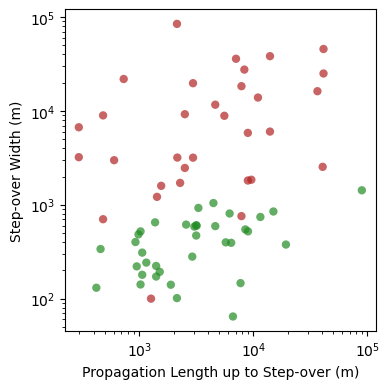

In [20]:
# Support for crack model 

category_colors = {'unbreached': 'firebrick', 'breached': 'forestgreen'}

# Create subplots
plt.figure(figsize=(4,4))
# Scatter plot
for row in stepover_data.itertuples():
    plt.scatter(row.length, row.width, color=category_colors.get(row.label, 'black'),alpha=0.7,edgecolor='none')

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Propagation Length up to Step-over (m)')
plt.ylabel('Step-over Width (m)')


plt.tight_layout()
plt.savefig('Step-overs/width_length_scaling.pdf')
plt.show()

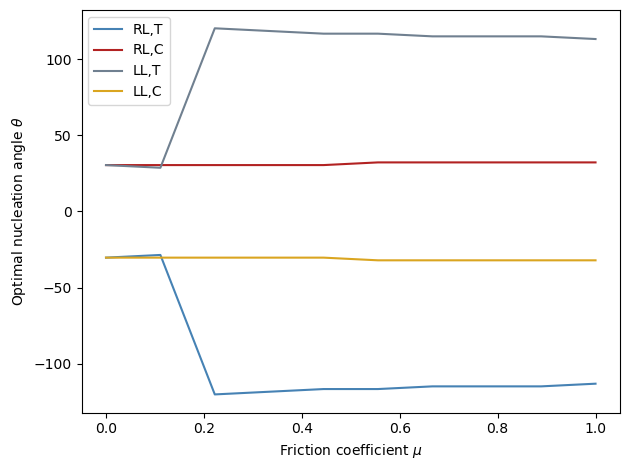

In [21]:
# change of optimal theta with changing friction
plt.figure()

stress_drop = 3*10**6
mu = 0.4

mu = np.linspace(0,1,10)
theta_RL_T = []
theta_RL_C = []
theta_LL_T = []
theta_LL_C = []

for i in range(len(mu)):
    s1,s2,s3,theta_RL_Ti = mode_II_stress_field(stress_drop,1000,1000,mu[i],'RL','releasing','plotNO')
    theta_RL_T.append(theta_RL_Ti)
    s1,s2,s3,theta_RL_Ci = mode_II_stress_field(stress_drop,1000,1000,mu[i],'RL','restraining','plotNO')
    theta_RL_C.append(theta_RL_Ci)
    s1,s2,s3,theta_LL_Ti = mode_II_stress_field(stress_drop,1000,1000,mu[i],'LL','releasing','plotNO')
    theta_LL_T.append(theta_LL_Ti)
    s1,s2,s3,theta_LL_Ci = mode_II_stress_field(stress_drop,1000,1000,mu[i],'LL','restraining','plotNO')
    theta_LL_C.append(theta_LL_Ci)

plt.plot(mu,[i * 180/np.pi for i in theta_RL_T],c='steelblue',label='RL,T')
plt.plot(mu,[i * 180/np.pi for i in theta_RL_C],c='firebrick',label='RL,C')
plt.plot(mu,[i * 180/np.pi for i in theta_LL_T],c='slategrey',label='LL,T')
plt.plot(mu,[i * 180/np.pi for i in theta_LL_C],c='goldenrod',label='LL,C')

plt.ylabel(r'Optimal nucleation angle $\theta$')
plt.xlabel(r'Friction coefficient $\mu$')
plt.legend()

plt.tight_layout()
plt.savefig('Step-overs/mu_0.6_optimal_angle_change.pdf')
plt.show()

### Results for constant stress drop and friction

/var/folders/bw/pbfwt2p16s729kbshjt5y7900000gr/T/ipykernel_76788/1520447929.py:81: UserWarning: The label '_child4' of <matplotlib.collections.PathCollection object at 0x29eadf010> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_elements,loc='upper left')


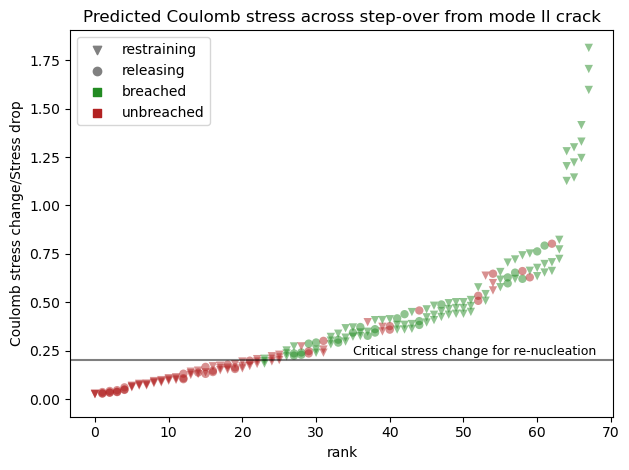

In [39]:
# Calculate the normal and the shear stress on each step-over
stress_drop = 3*10**6 
mui = np.array([0,0.3,0.6])


hack = np.array([1,2])

plt.figure()

legend_elements = [plt.scatter([0], [0], marker='v', color='grey', label='restraining'),
                   plt.scatter([0], [0], marker='o', color='grey', label='releasing'),
                   plt.scatter([0], [0], marker='s', color='forestgreen', label='breached'),
                   plt.scatter([0], [0], marker='s', color='firebrick', label='unbreached'),
                   plt.scatter([0], [0], marker='s', s=100, color='white')]



for p in range(len(mui)):
    mu = mui[p]
    c_stress = []  
    ratio = []
    for i in range(len(hack)):
        for index,value in stepover_data['width'].items():
            stress_dropi = stress_drop#sdrop[index]#random.randint(1*10**6, 10*10**6)
            #sdrop.append(stress_dropi)
            L = stepover_data.loc[index,'length']/2

            if stepover_data.loc[index, 'style'] == 'right-lateral':
                if stepover_data.loc[index, 'type'] == 'releasing':
                    shear_stress,normal_stress,coulomb_stress,theta_optimal = mode_II_stress_field(stress_dropi,L,value,mu,'RL','releasing','plotNO')
                    marker = 'o'
                    colors= {'unbreached': 'firebrick', 'breached': 'forestgreen'}

                elif stepover_data.loc[index, 'type'] == 'restraining':
                    marker = 'v'
                    shear_stress,normal_stress,coulomb_stress,theta_optimal= mode_II_stress_field(stress_dropi,L,value,mu,'RL','restraining','plotNO')
                    colors= {'unbreached': 'firebrick', 'breached': 'forestgreen'}  
                else:
                    raise KeyError("The step-over must be restraining or releasing")
                        
            elif stepover_data.loc[index, 'style'] == 'left-lateral':
                if stepover_data.loc[index, 'type'] == 'releasing':
                    marker = 'o'
                    colors= {'unbreached': 'firebrick', 'breached': 'forestgreen'}
                    shear_stress,normal_stress,coulomb_stress,theta_optimal = mode_II_stress_field(stress_dropi,L,value,mu,'LL','releasing','plotNO')
                elif stepover_data.loc[index, 'type'] == 'restraining':
                    marker = 'v'
                    colors= {'unbreached': 'firebrick', 'breached': 'forestgreen'}    
                    shear_stress,normal_stress,coulomb_stress,theta_optimal = mode_II_stress_field(stress_dropi,L,value,mu,'LL','restraining','plotNO')
                else:
                    raise KeyError("The step-over must be restraining or releasing")
                    
            else:
                print(stepover_data.loc[index, 'style'])
                raise KeyError("The crack must be right or left-lateral")

            c_stress.append(coulomb_stress)
            color = stepover_data.loc[stepover_data['width'] == value, 'label'].map(colors).values[0]
            
            if 'sorted_indices' in locals():
                index_sort = sorted_indices.index(index)
            else:
                index_sort = index      

            #plt.scatter(index_sort,coulomb_stress/10**6,c=color,marker=marker,alpha=0.2)
            if i ==1:
                plt.scatter(index_sort,coulomb_stress/stress_drop,c=color,marker=marker,edgecolors='none',alpha=0.5)
                ratio.append(coulomb_stress/stress_drop)
                

        if i == 0:
            sorted_indices = [b for b, _ in sorted(enumerate(c_stress), key=lambda x: x[1])]
        if i == 1:    
            del index_sort
            del sorted_indices
            

plt.axhline(0.2,alpha=0.5,c='black')
plt.text(35, 0.23, "Critical stress change for re-nucleation",fontsize=9)

plt.legend(handles=legend_elements,loc='upper left')
#plt.ylim(0,26)
plt.xlabel('rank')
plt.ylabel('Coulomb stress change/Stress drop')
plt.title(r'Predicted Coulomb stress across step-over from mode II crack')
plt.tight_layout()
plt.savefig('Step-overs/MC_Coulomb_stress_rank.pdf')
plt.show()

stepover_data['Ratio'] = ratio

# plt.figure()
# plt.scatter(stepover_data.index,stepover_data['sorted_BU'])
# plt.show()

<Axes: xlabel='Ratio', ylabel='label'>

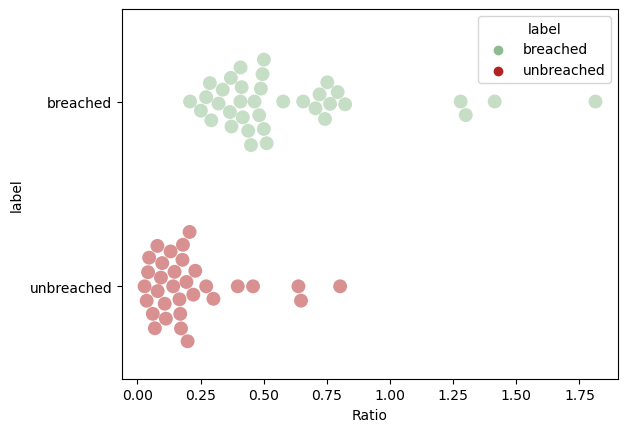

In [23]:
# logistic regression for stress ratio
plt.figure()
palette = {'breached': 'darkseagreen', 'unbreached': 'firebrick'}
    
sns.swarmplot(
    data=stepover_data,
    x='Ratio',
    y='label',
    size=10,
    hue="label",
    palette=palette,alpha=0.5
)

# probname = sklearn.linear_model.LogisticRegression(penalty='none',class_weight=class_weightb).fit(np.atleast_2d(xfeature).T,BUbin)

# # tests
# acc = accuracy_score(BUbin, probname.predict(np.atleast_2d(xfeature).T))
# pre = precision_score(BUbin, probname.predict(np.atleast_2d(xfeature).T))
# f1 = f1_score(BUbin, probname.predict(np.atleast_2d(xfeature).T))
# roc =  roc_auc_score(BUbin, probname.predict_proba(np.atleast_2d(xfeature).T)[:,1])
# confusion_matrixi = confusion_matrix(BUbin, probname.predict(np.atleast_2d(xfeature).T))
# #confusion_matrixi = plot_confusion_matrix(probname, np.atleast_2d(xfeature).T, BUbin)

# # plot passing probability
# x = np.atleast_2d(np.linspace(minx,  maxx,10000)).T
# axesid.plot(x,probname.predict_proba(x)[:,1],color = colorline)
# axesid.text(x[-10], -0.1, f'ROC={roc:.2f}', ha='right', va='top')

# axesid.set_ylabel('Passing probability')
# # axesid.set_yticks([0,1])
# axesid.set_xlabel(xlabel)
# axesid.set_yticklabels(["Breached", "Unbreached"],rotation=90,va='center')
# axesid.get_legend().remove()

In [24]:
location = stepover_data.loc[(stepover_data['label'] == 'unbreached') & (stepover_data['Ratio'] > 0.5)].index
print(stepover_data.loc[location])

          width       length         type          style       label  \
38  2538.352560  40531.83467    releasing  right-lateral  unbreached   
48    99.956689   1270.99554  restraining  right-lateral  unbreached   
56   757.379434   7876.11639    releasing  right-lateral  unbreached   

         event     Ratio  
38      Denali  0.802530  
48  HectorMine  0.637548  
56        Napa  0.647647  


In [25]:
stepover_data['event'].replace('Izmit_Kocaeli', 'Izmit', inplace=True)

# Convert DataFrame to LaTeX table with custom options for longtable and booktabs
# Convert DataFrame to LaTeX table with custom options for formatting
latex_table = stepover_data.to_latex(index=False, 
                                     escape=False, 
                                     column_format='|c|c|c|c|c|c|c|',  # Centering first, second, and seventh columns and adding edges
                                     caption='Step-over characteristics and predicted stress ratio.',  # Adding caption
                                     label='tab:step_over_stress_ratio',  # Adding a label for cross-referencing
                                     longtable=True,  # Enable longtable environment for multiple pages
                                     header=["Width (m)", "Length (m)", "Type", "Style", "Label", "Event", "Ratio"],  # Adding custom header
                                     formatters=[
                                         lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else f'{x}',  # Format float columns with 2 decimal places, keep non-numeric columns as strings
                                         lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else f'{x}',  # Format float columns with 2 decimal places, keep non-numeric columns as strings
                                         lambda x: f'{x}',  # Keep other columns as strings
                                         lambda x: f'{x}',  # Keep other columns as strings
                                         lambda x: f'{x}',  # Keep other columns as strings
                                         lambda x: f'{x:.0f}' if isinstance(x, int) else f'{x}',  # Format integer column with no decimal places, keep non-integer columns as strings
                                         lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else f'{x}'  # Format float columns with 2 decimal places, keep non-numeric columns as strings
                                     ]
                                    )


with open('stepover_info.tex', 'w') as f:
    f.write(latex_table)

/var/folders/bw/pbfwt2p16s729kbshjt5y7900000gr/T/ipykernel_76788/2958194583.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = stepover_data.to_latex(index=False,


In [26]:
# load data from FDHI analysis
data = pd.read_csv('EQgate_geometries.csv')
feature = data["Feature"].unique()
grouped = data.groupby(data.Feature)
group = grouped.get_group('stepover')

In [27]:
matching_rows = data.loc[data['Length (m) or angle (deg)'].isin(stepover_data.loc[location, 'width'])]

In [28]:
matching_rows

,FDHI ID,Earthquake,Date,Magnitude,Cumulative displacement,Style,Hypocenter lat,Hypocenter lon,Feature,Breached or unbreached,...,Spacing double bend (m),Type (length or angle),Location along rupture,Total rupture length,Normalized location,x1check,y1check,UTM zone,latcheck,loncheck
957,10,Denali,'2002-11-03',7.90,370.0,Strike-Slip,63.5420,-147.4444,stepover,unbreached,...,0.0,length,16699.999933,278702.916265,0.059920,721039.827367,6.931444e+06,6N,62.448190,-142.714514
967,2,HectorMine,'1999-10-16',7.13,3.0,Strike-Slip,34.5981,-116.2645,stepover,unbreached,...,0.0,length,41699.943427,48174.149281,0.865608,576657.174149,3.806480e+06,11N,34.396899,-116.166020
975,13,Napa,'2014-08-24',6.00,10.0,Strike-Slip,38.2150,-122.3120,stepover,unbreached,...,0.0,length,22099.942910,22219.974514,0.994598,556380.138543,4.243216e+06,10N,38.335310,-122.354892


### Bend amplification analysis

In [29]:
# load data
data = pd.read_csv('EQgate_geometries.csv')
feature = data["Feature"].unique()
grouped = data.groupby(data.Feature)
bend = grouped.get_group('bend')
# Separate the bends into 'Breached' and 'Unbreached'
breached_bends = bend[bend['Breached or unbreached'] == 'breached']
unbreached_bends = bend[bend['Breached or unbreached'] == 'unbreached']

In [30]:
# equation for bend amplification as a function of angle
def bend_amplification(angle,mu):
    angle = np.deg2rad(angle)
    amplification = ((mu + np.tan(angle))/(1-mu*np.tan(angle)))-mu
    return amplification

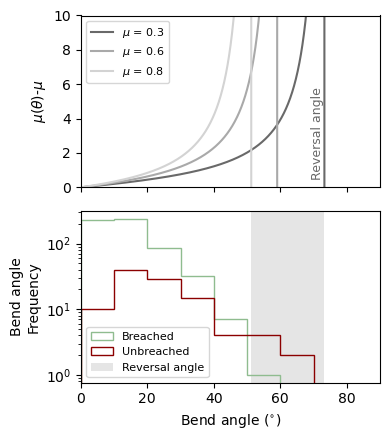

In [31]:
angle_range = np.linspace(0,90,1000)
mu_range = [0.3,0.6,0.8]
c_range = ['dimgray','darkgray','lightgray','silver']

fig,ax=plt.subplots(2,1,figsize=(4,4.5),sharex=True)

x_at_max_y = []
for i in range(len(mu_range)):
    amplification = []
    mui = mu_range[i]
    for j in range(len(angle_range)):
        amp = bend_amplification(angle_range[j],mui)
        amplification.append(amp)
    ax[0].plot(angle_range,amplification,label=r'$\mu$ = '+str(mui),color=c_range[i])
    mumax = np.argmax(amplification)
    x_at_max_y.append(angle_range[mumax])
    #plt.axvline(x_at_max_y,linestyle='--',color='red')
    ax[0].set_ylabel(r'$\mu(\theta)$-$\mu$')
    ax[0].set_ylim(0,10)
    ax[0].legend(loc='upper left',fontsize=8)

ax[0].text(np.max(x_at_max_y)-4, 0.4, "Reversal angle",fontsize=9, rotation=90, va='bottom', ha='left', color=c_range[0])

bin_edges = np.linspace(0, 90, 10)  # 10 bins from 0 to 90 inclusive

ax[1].hist(breached_bends['Length (m) or angle (deg)'], bins=bin_edges, color='darkseagreen', histtype='step',label='Breached')
ax[1].hist(unbreached_bends['Length (m) or angle (deg)'], bins=bin_edges, color='darkred', histtype='step',label='Unbreached')
ax[1].set_ylabel('Bend angle\nFrequency')
ax[1].set_xlim(0,90)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'Bend angle ($^{\circ}$)')
ax[1].axvspan(np.min(x_at_max_y), np.max(x_at_max_y), alpha=0.2, color='gray',lw=0, label='Reversal angle')
ax[1].legend(loc='lower left',fontsize=8)
# Create the histogram
# histB, bin_edges = np.histogram(breached_bends['Length (m) or angle (deg)'], bins=bin_edges)
# histU, bin_edges = np.histogram(unbreached_bends['Length (m) or angle (deg)'], bins=bin_edges)
# ratio = histU/histB
# bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
# plt.plot(bincenters,ratio,color='red')
plt.tight_layout()

plt.savefig('Step-overs/amplification_angle.pdf')


In [32]:
def calculate_coulomb_stress_change(angle,mu,type):
    r = 30
    center = 100
    angle_rad = np.deg2rad(angle)
    if type == 'restraining':
        cstress_change = np.sin(2*angle_rad)*r - mu*(np.cos(2*angle_rad)*r+center)
        normal_stress = - mu*(np.cos(2*angle_rad)*r+center)
        shear_stress = np.sin(2*angle_rad)*r
    elif type == 'releasing':
        cstress_change = np.sin(2*angle_rad)*r + mu*(np.cos(2*angle_rad)*r+center)
        normal_stress = mu*(np.cos(2*angle_rad)*r+center)
        shear_stress = np.sin(2*angle_rad)*r
    else:
        exception = 'type must be either "restraining" or "releasing"'
    return cstress_change, normal_stress, shear_stress

In [33]:
# for each angle and value of mu, calculate the coulomb stress change for a restraining and a releasing bend 

mu_array = []
angle_array = []
type_array = []
cstress_array = []
nstress_array = []
sstress_array = []

mu_range = np.linspace(0,1,10)
angle_range = np.arange(0,100,10)

for mu in mu_range:
    for angle in angle_range:
        cstress_change, normal_stress, shear_stress = calculate_coulomb_stress_change(angle,mu,'restraining')
        cstress_array.append(cstress_change)
        nstress_array.append(normal_stress)
        sstress_array.append(shear_stress)
        type_array.append('restraining')
        angle_array.append(angle)
        mu_array.append(mu)

        cstress_change, normal_stress, shear_stress = calculate_coulomb_stress_change(angle,mu,'releasing')
        cstress_array.append(cstress_change)
        nstress_array.append(normal_stress)
        sstress_array.append(shear_stress)
        type_array.append('releasing')
        angle_array.append(angle)
        mu_array.append(mu)

In [34]:
df = pd.DataFrame({
    'mu': mu_array,
    'angle': angle_array,
    'type': type_array,
    'cstress': cstress_array,
    'nstress': nstress_array,
    'sstress': sstress_array
})

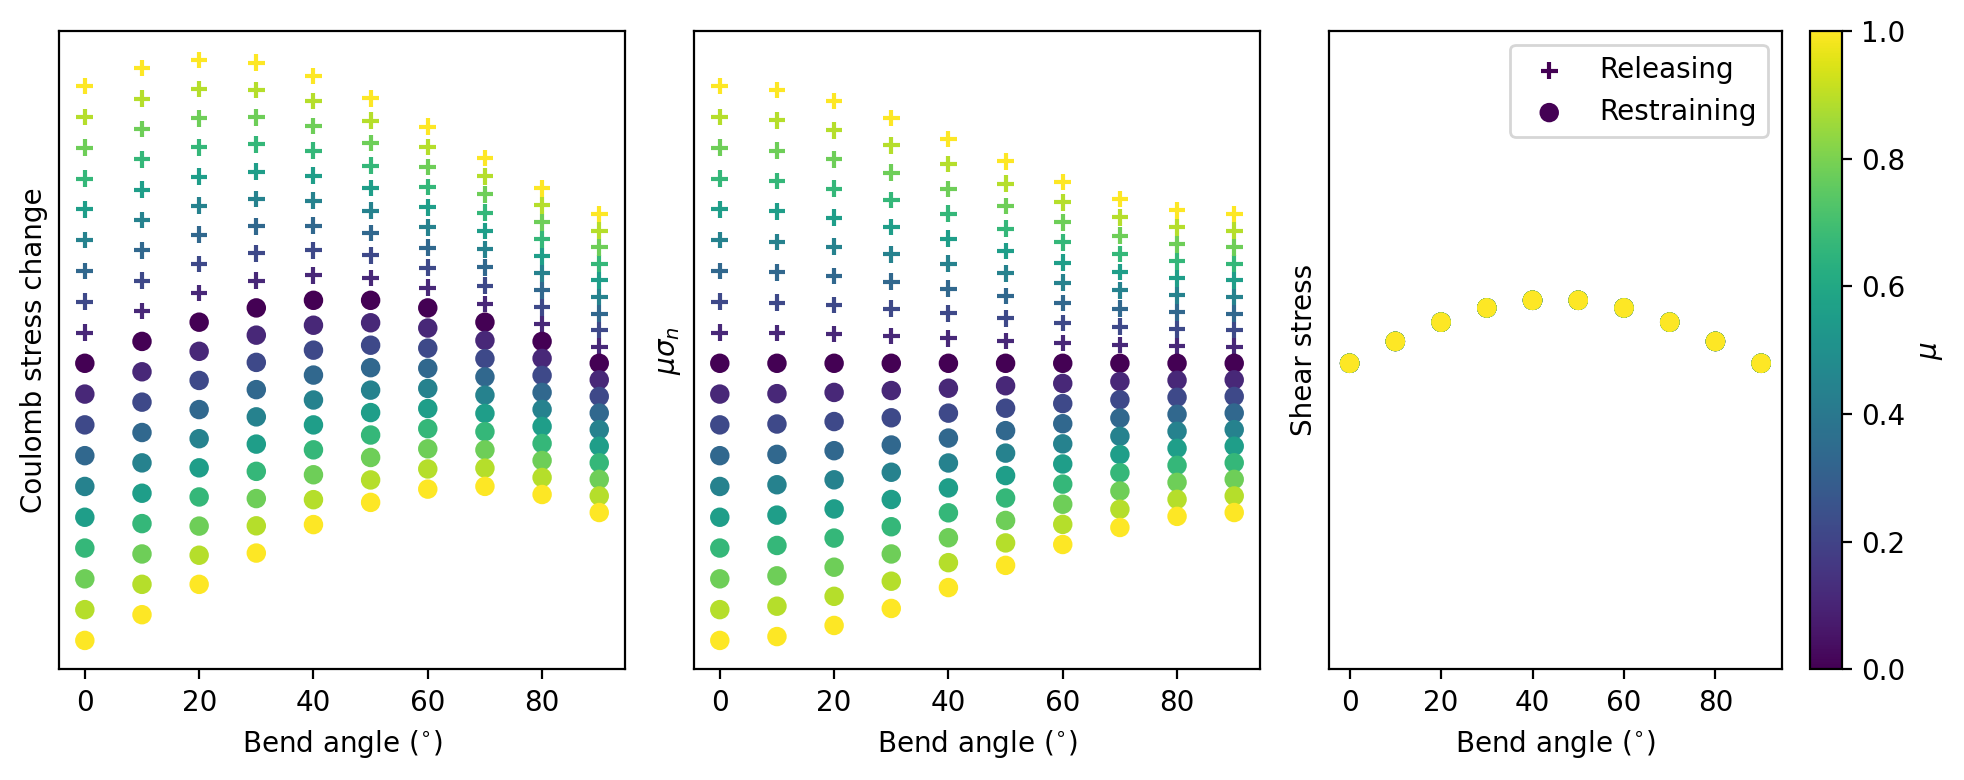

In [35]:
# Separate dataframes for releasing and restraining data
releasing_df = df[df['type'] == 'releasing']
restraining_df = df[df['type'] == 'restraining']

fig,axes = plt.subplots(1,3,figsize=(10,4),dpi=200,sharey=True)
# Plot cstress vs angle, color-coded by mu and line style based on type
axes[0].scatter(releasing_df['angle'], releasing_df['cstress'], c=releasing_df['mu'], cmap='viridis', label='Releasing', marker='+')
axes[0].scatter(restraining_df['angle'], restraining_df['cstress'], c=restraining_df['mu'], cmap='viridis', label='Restraining')
#axes[0].set_yticks([])


# Set x and y axis labels
axes[0].set_xlabel('Bend angle ($^{\circ}$)')
axes[0].set_ylabel('Coulomb stress change')

axes[1].scatter(releasing_df['angle'], releasing_df['nstress'], c=releasing_df['mu'], cmap='viridis', label='Releasing', marker='+')
axes[1].scatter(restraining_df['angle'], restraining_df['nstress'], c=restraining_df['mu'], cmap='viridis', label='Restraining')
#axes[1].set_yticks([])


# Set x and y axis labels
axes[1].set_xlabel('Bend angle ($^{\circ}$)')
axes[1].set_ylabel(f'$\mu\sigma_n$')


axes[2].scatter(releasing_df['angle'], releasing_df['sstress'], c=releasing_df['mu'], cmap='viridis', label='Releasing', marker='+')
axes[2].scatter(restraining_df['angle'], restraining_df['sstress'], c=restraining_df['mu'], cmap='viridis', label='Restraining')
axes[2].set_yticks([])
# crearte colorbar
cbar = plt.colorbar(axes[2].collections[0], ax=axes[2])
# create colorbar label
cbar.set_label('$\mu$')

# Set x and y axis labels
axes[2].set_xlabel('Bend angle ($^{\circ}$)')
axes[2].set_ylabel('Shear stress')

# Add legend
axes[2].legend()

# Show the plot
plt.tight_layout()
plt.show()